In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pylab as plt
import numpy as np
from keras.preprocessing import image    
import os
import PIL.Image as Image

Using TensorFlow backend.


## load images and classes

In [2]:
IMG_HEIGHT, IMG_WIDTH = 128, 128

test_dir = "./images/to_predict/"

test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    brightness_range=(1.0, 1.0),
    horizontal_flip=False,
    vertical_flip=False
)

nr_images = 36

# to count all images
#nr_images = 0
#for imgDir in os.listdir(test_dir):
#    for img in os.listdir(test_dir + imgDir):
#        nr_images+=1
        
test_data = test_image_generator.flow_from_directory(batch_size=nr_images,
                                                           directory=test_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))

test_images, labels = next(test_data)



Found 76 images belonging to 4 classes.


## predict images

In [3]:
def predict_images(name):
    model = tf.keras.models.load_model('models/%s.h5' % name)
    print("predict images with model %s:" % name)
    
    class_labels = {v:k for k,v in test_data.class_indices.items()}
 
    fig, axes = plt.subplots(int((nr_images+1)/6), 6, figsize=(20,20))
    axes = axes.flatten()
   
    for img, label, ax in zip(test_images, labels, axes):
        actual_class = np.argmax(label)
        actual_label = class_labels[actual_class]
        
        prediction = model.predict(img[np.newaxis,:])
        
        predicted_class = np.argmax(prediction[0], axis=-1)
        predicted_label = class_labels[predicted_class]
        
        ax.set_title("Pred %s / Act %s" % (predicted_label, actual_label))
        ax.imshow(img)
        ax.axis('off')
        

## show models

predict images with model drink-detection-model1-g1:


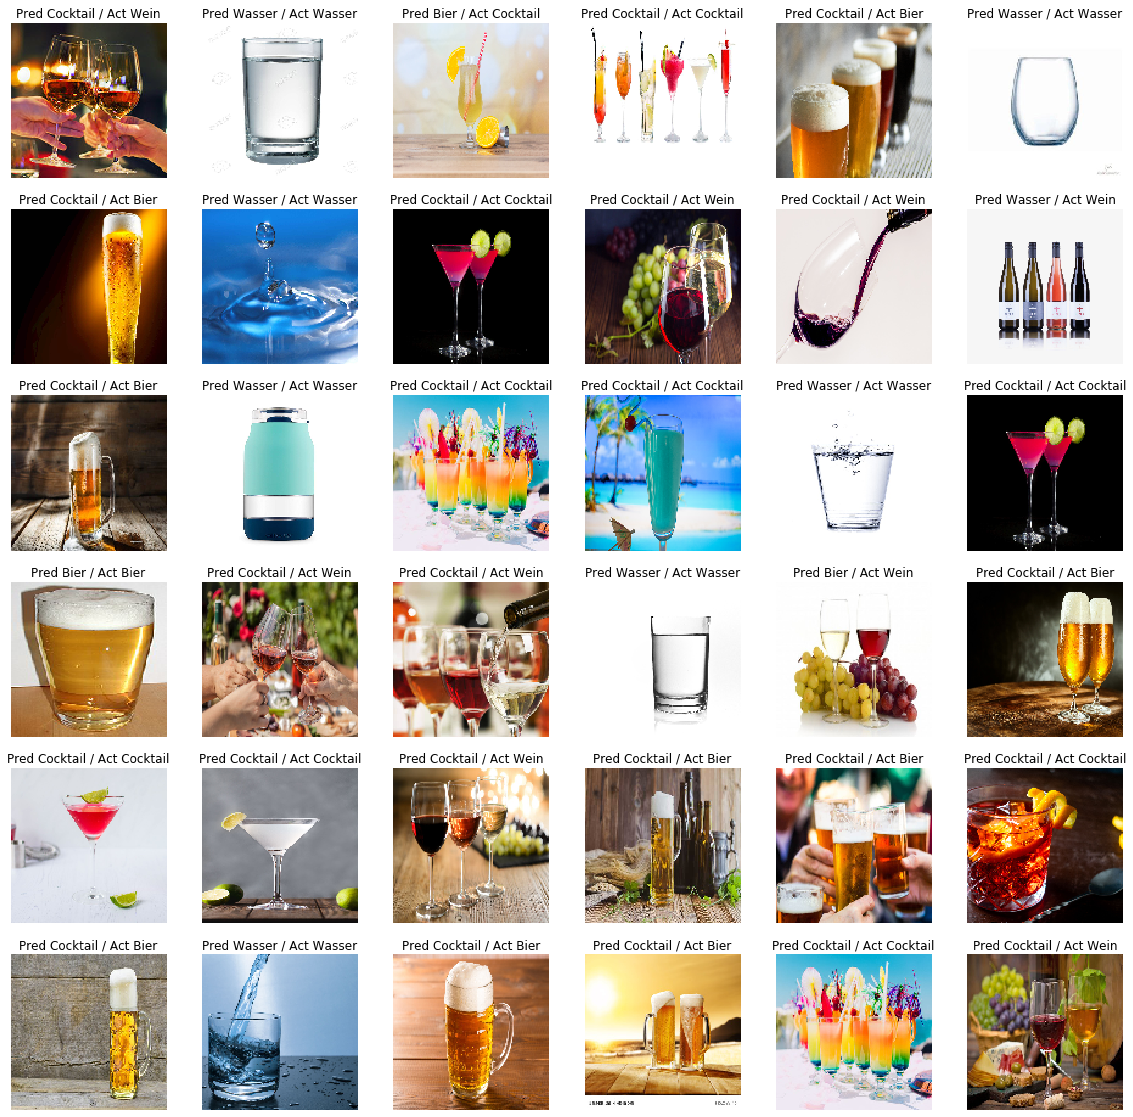

In [4]:

    predict_images("drink-detection-model1-g1")
    

predict images with model drink-detection-model1-g2:


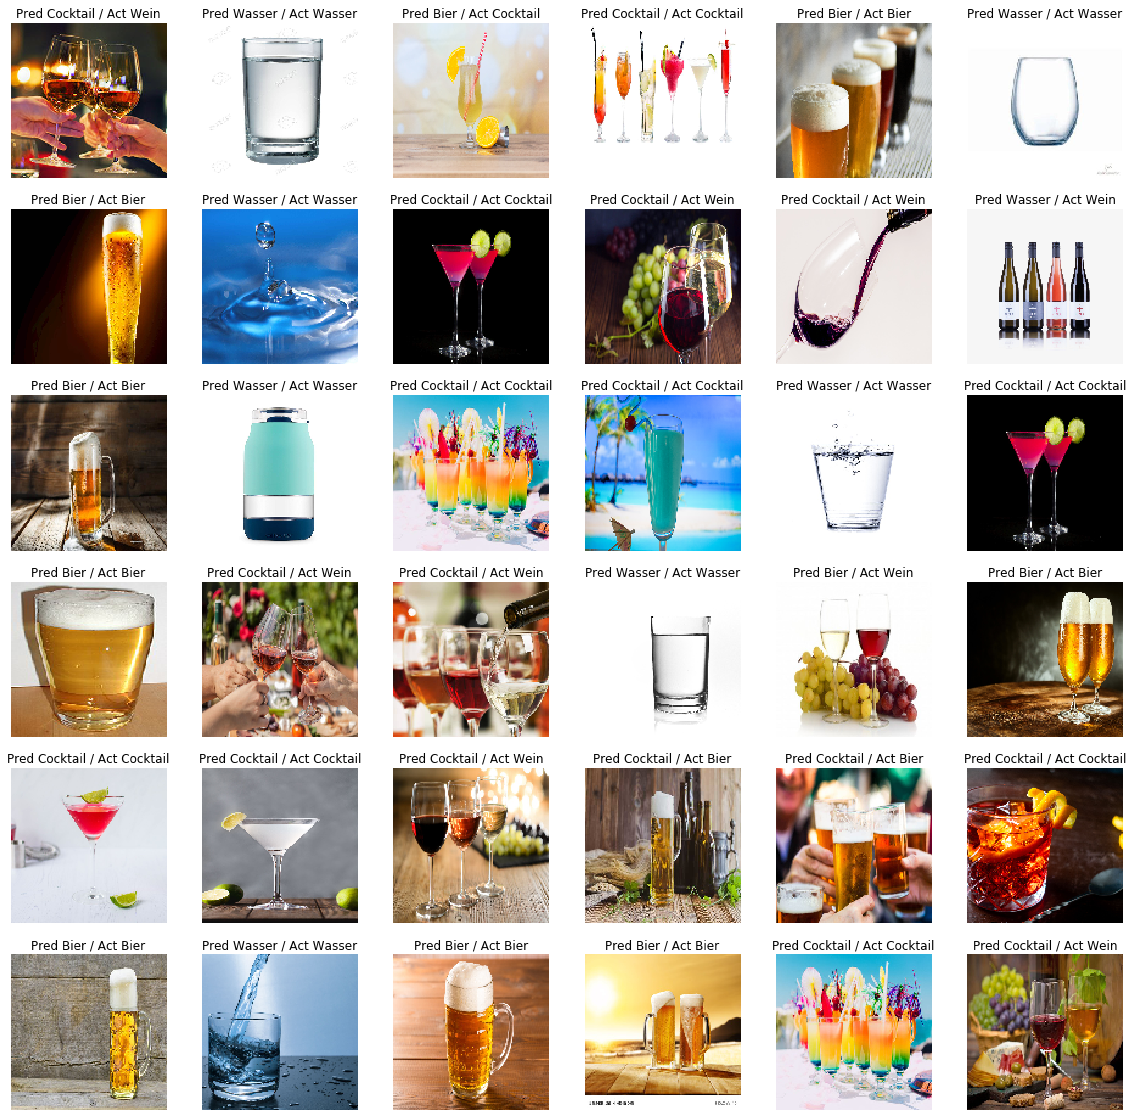

In [5]:
    predict_images("drink-detection-model1-g2")

predict images with model drink-detection-model2-g1:


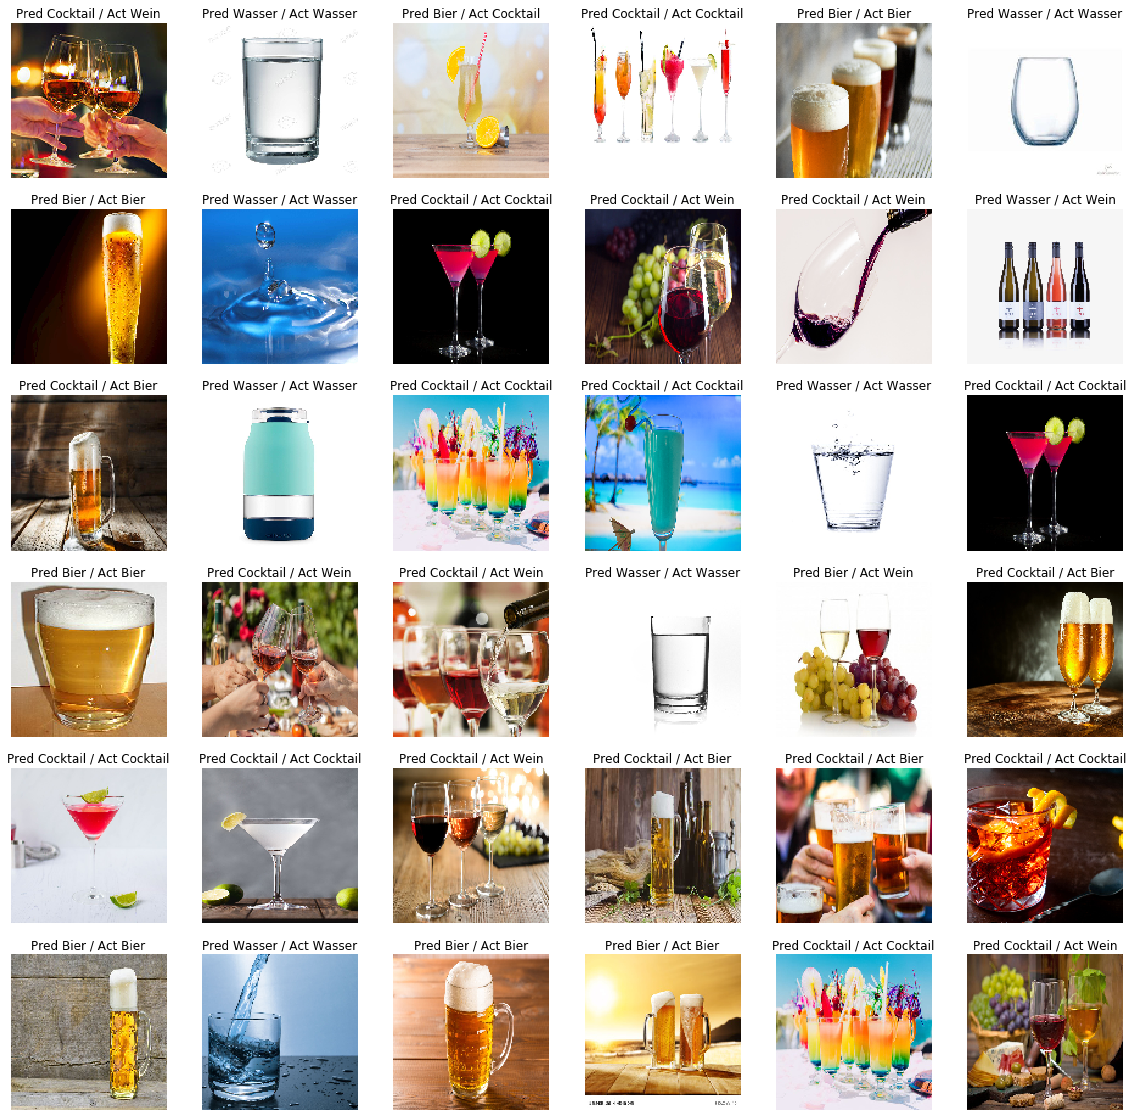

In [6]:
    predict_images("drink-detection-model2-g1")

predict images with model drink-detection-model2-g2:


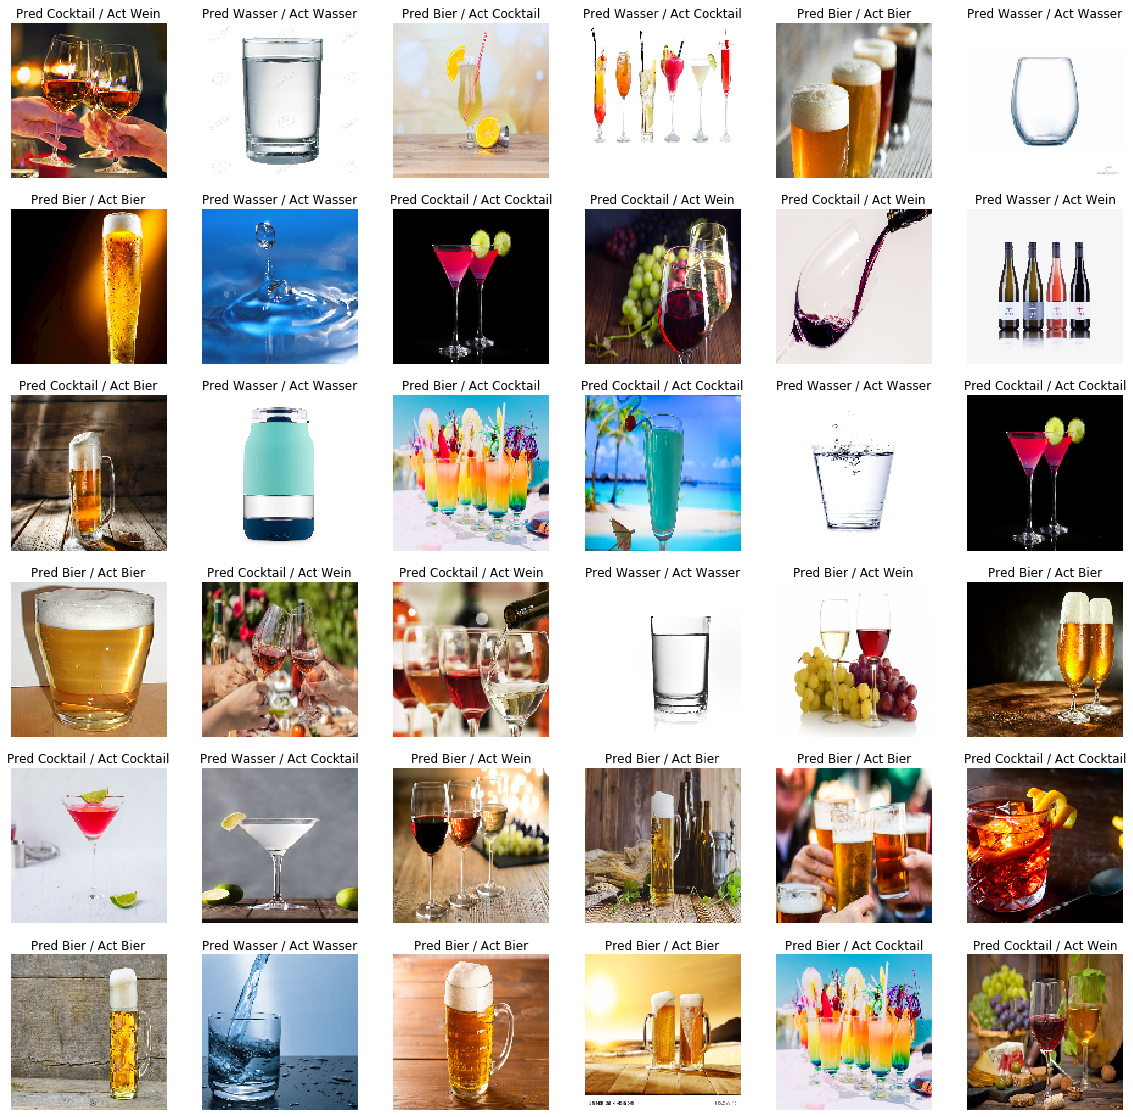

In [7]:
    predict_images("drink-detection-model2-g2")